In [24]:
from scipy import stats
from matplotlib import pyplot
import numpy as np
data_mg = [0.8012009087958456, 0.814223608281097, 0.7955796065717179, 0.8026368787089497, 0.7908128415300546, 0.7711543839984623, 0.7879394933362418, 0.7664231894261311, 0.7962550380220783, 0.7925245033345651]
print(np.mean(data_mg))

0.7918750452005143


In [25]:
data_sg = [0.8321396140284856, 0.8301358912869703, 0.8311364478766845, 0.8200772522404027, 0.8306307161488427, 0.7979060913705585, 0.8266626238124116, 0.8006583741103088, 0.8116103043221746, 0.835188017509625]
print(np.mean(data_sg))
print(stats.ttest_ind(data_mg, data_sg))

0.8216145332706464
Ttest_indResult(statistic=-4.770217546888722, pvalue=0.00015303483275327354)


In [34]:
def mean_confidence_interval(data, confidence=0.9):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def plot_with_err(prop_1, prop_ci_1, prop_2, prop_ci_2, plot_title, label_1, label_2):
    top_x = [0]
    bot_x = [1]
    # print(prop_1, prop_2, prop_ci_1)
    prop_ci_1 = [[prop_1 - prop_ci_1[0]], [prop_ci_1[1] - prop_1]]
    # print(prop_1, top_x)
    pyplot.errorbar(top_x[0], [prop_1], prop_ci_1, color='b', marker='s', label=label_1)
    
    prop_ci_2 = [[prop_2 - prop_ci_2[0]], [prop_ci_2[1] - prop_2]]
    pyplot.errorbar(bot_x[0], [prop_2], prop_ci_2, color='r', marker='s', label=label_2)
    
    ax = pyplot.gca()
    ax.set_facecolor('#FFFFFF')
    pyplot.xticks([-0.5, 0, 0.5, 1, 1.5])
    pyplot.ylim([0.775,0.85])
    # print(prop_ci_1[0], top_x)
    
    pyplot.legend()
    pyplot.title(plot_title)
    pyplot.show()

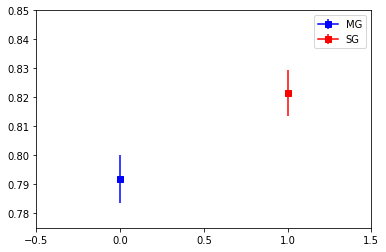

In [35]:
m0, l0, h0 = mean_confidence_interval(data_mg)
m1, l1, h1 = mean_confidence_interval(data_sg)

plot_with_err(m0, (l0, h0), m1, (l1, h1), "", "MG", "SG")